# **Text Normaliztion in Pashto**

In [16]:
import re
import pandas as pd
from google.colab import drive
import seaborn as sns

In [6]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/pashto_dataset.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,desc
0,له دې اعلان وروسته د دغه هېواد لر او بر لاریون...
1,د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري...
2,د پاکستان د پوځ مشر وايي، چې هېواد به یې تر هغ...
3,د (هرډوز) کمپنۍ مشر محمد الفائد چې زوی یې (دود...
4,د طالبانو حکومت د کورنیو چارو وزارت کابل ښار ک...


In [8]:
df['length'] = df['desc'].apply(lambda row: len(row.split()))
print('Mean length: ', df['length'].mean())

Mean length:  120.20111008325624


<Axes: xlabel='length', ylabel='Count'>

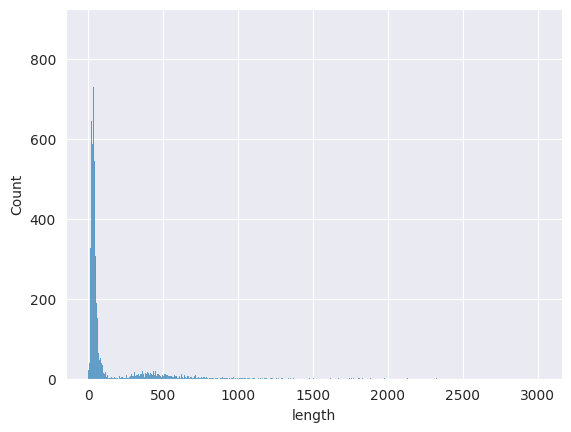

In [13]:
sns.set_style(style="darkgrid")
sns.histplot(df['length'])


In [14]:
# Clean text data
def cleantwt(twt):
    if isinstance(twt, str):
        twt = re.sub("RT", " ", twt)
        twt = re.sub("#[A-Za_z0-9]+", "", twt)
        twt = re.sub(r'[۰-۹]+', '', twt)
        twt = re.sub('[۰۱۲۳۴۵۶۷۸۹]+','',twt)
        twt = re.sub(r'[A-Za-z]', '', twt)
        twt = re.sub("''", "", twt)
        twt = re.sub("\\n", "", twt)
        twt = re.sub("https?:\/\/\S+", "", twt)
        twt = re.sub('@[\S]*', '', twt)
        twt = re.sub('^[\s]+|[\s]+$', '', twt)
        twt = re.sub(r'[$+&+;+]|[><!+،:,\(\).+،+٬+,+]|[-+]|[…]|[\[\]»«//]|[\\]|[#+]|[_+]|[٪+]|[%]|[*+]|[؟+]|[?+]|[""]|@', ' ',twt)
        twt = re.sub("لوبې", "لوبه", twt)    # Replace "لوبې" with "لوبه"
        twt = re.sub("لوبډله", "لوبه", twt)
        twt = re.sub("لوبډلې", "لوبه", twt)
        twt = re.sub("افغانان", "افغان", twt)  # Replace "افغانان" with "افغان"
        twt = re.sub("کډوالو", "کډوال", twt)
        twt = re.sub("پاکستاني", "پاکستان", twt)
        twt = re.sub("افغانانو", "افغانان", twt)  # Replace "افغانانو" with "افغانان"
        twt = re.sub("ښځې", "ښځه", twt)

        return twt
    else:
        return twt

df["clean_text"] = df["desc"].apply(cleantwt)


<>:11: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1354251041.py:11: SyntaxWarning: invalid escape sequence '\/'
  twt = re.sub("https?:\/\/\S+", "", twt)
/tmp/ipython-input-1354251041.py:12: SyntaxWarning: invalid escape sequence '\S'
  twt = re.sub('@[\S]*', '', twt)
/tmp/ipython-input-1354251041.py:13: SyntaxWarning: invalid escape sequence '\s'
  twt = re.sub('^[\s]+|[\s]+$', '', twt)


In [15]:
df['clean_text'][1]

'د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري او د هغې مور عنصرین بخاري ته د پلان له مخې د دوو ځوانانو وژلو له کبله د عمري زندان سزا ورکړې  د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري او د هغې مور عنصرین بخاري ته د پلان له مخې د دوو ځوانانو وژلو له کبله د عمري زندان سزا ورکړې  محکمې په دې قضیه کې دوو نورو کسانو ریحان کاروان او رئیس جمال ته هم د عمري زندان او درې کسانو ته بیا د غیرعمدي قتل په تور سزا ورکړې  ټېک ټاکرې مهک بخاري ته ټولټال  کاله اته میاشتې او مور یې عنصرین بخاري په  کاله او نهه میاشتو زندان سزا محکومې شوې  د یادونې ده  چې رئیس جمال پر یوې نجلۍ د جنسي تېري جرم له کبله په  کال کې په لس کلن زندان سزا محکوم شوی او له هغه راهیسې په زندان کې دی  له نوې سزا سره به د نوموړي ټولټال سزا  کالو او  ورځو ته ورسېږي  ریحان کاروان ته بیا د  کاله بند سزا ورکړل شوې  په دې قضیه کې په غیرعمدي قتل تورن امیر جمال  کاله  نتاشا اختر  کاله او صناف ګل مصطفیٰ هم په  کاله بند محکوم شوي دي  د بي بي سي خبریالې ایملي اینډرسن د محکمې له ودانۍ په خپل استول شوي رپوټ کې وویل  مور او لور دواړو د محکمې پ